# How to build a genotype-phenotype map (a.k.a. sequence space) from protein lattice models

This notebook demonstrates how to use Jesse Bloom's **protein lattice model package**, [latticeproteins](), to build genotype-phenotype map. The phenotypes are the protein's folding stability in this case. You must have `latticeproteins` installed as a dependency for this package. 

We'll begin by importing some of his package here.

In [1]:
import os
from latticeproteins.conformations import Conformations

In `latticeproteins`'s `conformations` module, we can build the ensemble of all possible conformations for sequences of the same length.

In [2]:
length = 6
database_dir = "%s/database" % os.getcwd()
c = Conformations(length, database_dir)

Here comes the new stuff...

We'll import the `LatticeSequenceSpace` object which will build a sequence space between two starting sequences that differ at all sites.

In [3]:
from latticegpm.space import LatticeConformationSpace
from latticegpm.utils import search_conformation_space

First, we need to find two sequences that have a non-zero fitness and differ at all sites! `search_fitness_landscape` does exactly that.

In [22]:
temperature = 1.0
threshold = -0.5
wildtype, mutant = search_conformation_space(c, temperature, threshold)
print("Wildtype sequence: " + wildtype)
print("Mutant sequence: " + mutant)

Wildtype sequence: RAWWTA
Mutant sequence: YISGLF


In [28]:
# These sequences are known to have exactly 2 conformations in the sequence space
wildtype = "INDINR"
mutant = "LFRALM"

Now, we'll build a sequence space between these two ligands with the `LatticeSequenceSpace` object and print out some example nodes in this space.

In [29]:
# Create an instance of LatticeFitnessSpace
sequence_space = LatticeConformationSpace(wildtype, mutant, c, temperature=temperature)
# Print some example sequence
sequence_space.print_sequences(sequence_space.genotypes[0:5])

* * * *
       
* N-D *
  | |  
* I I *
    |  
* R-N *
       
* * * *
* * * *
       
* N-D *
  | |  
* I I *
    |  
* M-N *
       
* * * *
* * * *
       
* N-D *
  | |  
* I I *
    |  
* R-L *
       
* * * *
* * * *
       
* N-D *
  | |  
* I A *
    |  
* R-N *
       
* * * *
* * * *
       
* N-R *
  | |  
* I I *
    |  
* R-N *
       
* * * *


We can access all sequences and fitness in this space by calling these properties.

In [30]:
genotypes = sequence_space.genotypes
phenotypes =  sequence_space.phenotypes

## Construct NetworkX DiGraph object

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

A simple call to the `build_graph` method adds a `.Graph` attribute to the `latticegpm` object. 

In [32]:
sequence_space.build_graph()

This attribute is a complete NetworkX `DiGraph` object which can be passed to any NetworkX algorithm.

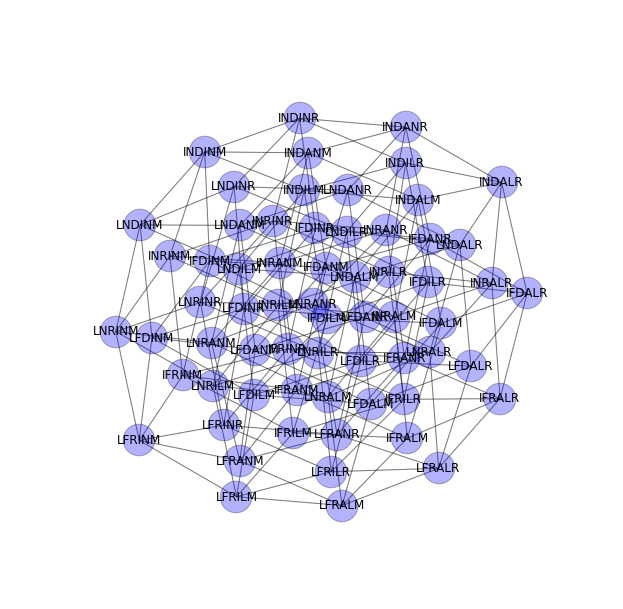

In [33]:
plt.figure(figsize=[8,8])

nx.draw(sequence_space.Graph,
    with_labels=True, # add sequence labels
    node_color='b',   # color nodes blue
    pos=nx.spring_layout(sequence_space.Graph), # spring loaded layout of nodes
    node_size=1000, # make node sizes bigger from default
    arrows=False,   # remove arrows from DiGraph
    alpha = 0.3     # lighten opacity of nodes
)